# Naiv Bayes

## Data generation

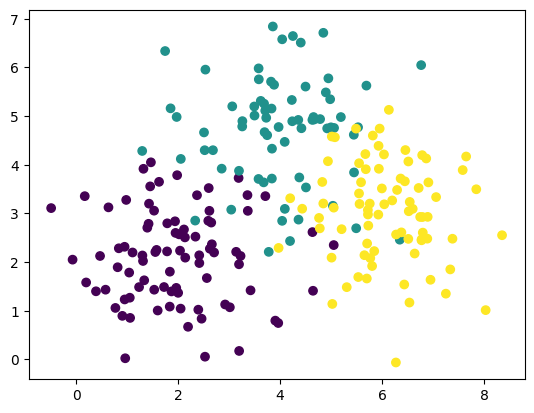

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

s_1 = rnd.randint(65,85)
s_2 = rnd.randint(70,80)
s_3 = rnd.randint(65,80)

# Generate data
x_1 = np.random.multivariate_normal([2,2], [[1,0],[0,1]], s_1)
x_2 = np.random.multivariate_normal([4,5], [[1,0],[0,1]], s_2)
x_3 = np.random.multivariate_normal([6,3], [[1,0],[0,1]], s_3)

# X and y
X = np.concatenate([x_1, x_2, x_3])
y = np.concatenate([np.zeros(s_1), np.ones(s_2), 2 * np.ones(s_3)])

# Plot
plt.scatter(X[:,0], X[:,1], c=y)

## Maximum a posteriori (MAP)

In [2]:
import collections

class NaivBayes:
    
    # Params
    X = []
    y = []
    μ = []
    σ = []
    K = 0
    prior_K = []

    # Learn the parameters of the data
    def train(self, X, y):
        
        # Set self params
        self.X = X
        self.y = y
        self.K = np.unique(y).size
        self.prior_K = collections.Counter(self.y)

        # Train the model
        for k in range(self.K):
            self.μ.append(np.mean(X[y == k], axis=0))
            self.σ.append(np.var(X[y == k]))

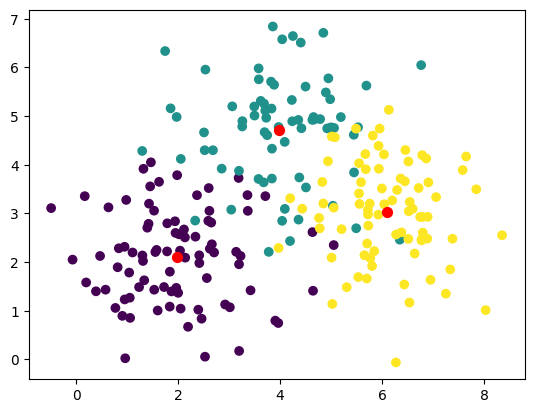

In [3]:
# Train the NaivBayes classification model
nb = NaivBayes()
nb.train(X, y)

# Plot
plt.scatter(X[:,0], X[:,1], c=y)
for k in range(nb.K):
    plt.scatter(nb.μ[k][0], nb.μ[k][1], c='red', s=50)